In [1]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

In [2]:
maxiter = 200000

def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5)
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [3]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

In [4]:
eps = 1e-1

## LINEAR

Training first model ... 


c:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
c:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


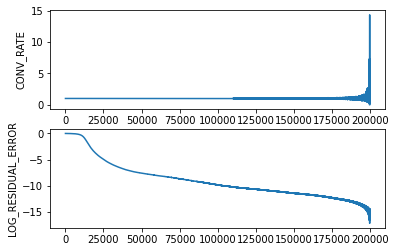

Fit time: 5152.099739551544, #SV: 1216
SUM OF eps-LOSS: 22006.037679664485
DEVSET MEE: 3.464893969348124


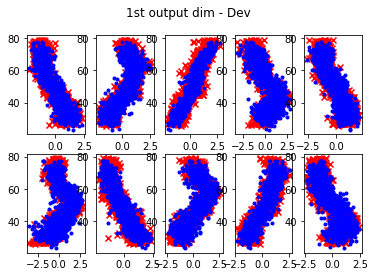

Testing the model
SUM OF eps-LOSS: 5755.918531284682
TEST MEE: 3.5524703279544


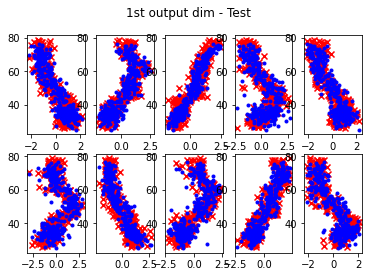

In [5]:
cup_model2 = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')
lin = cup_model2

In [6]:
cup_model2.history['fstar']

-3138.9241611255775

## POLY

Training first model ... 


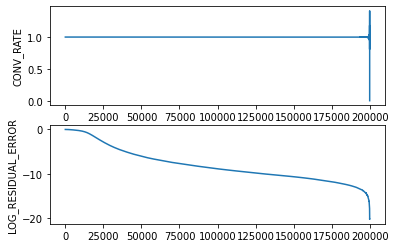

Fit time: 4630.199463844299, #SV: 1220
SUM OF eps-LOSS: 6350.011496820408
DEVSET MEE: 1.7428815161705378


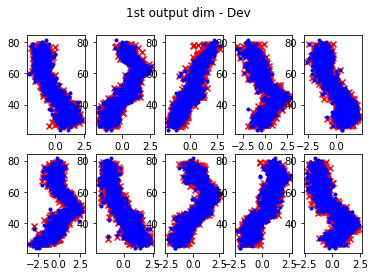

Testing the model
SUM OF eps-LOSS: 2153.740920562892
TEST MEE: 2.1390591339575438


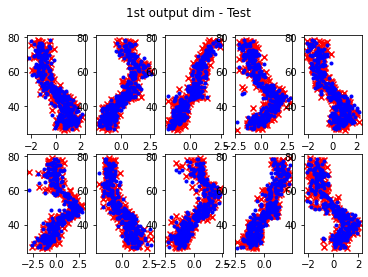

In [7]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')
poly = cup_model2

In [8]:
cup_model2.history['fstar']

-22463.341133487796

## RBF

Training first model ... 


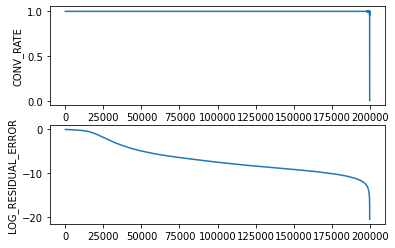

Fit time: 4919.889454364777, #SV: 1218
SUM OF eps-LOSS: 4621.969175565915
DEVSET MEE: 1.426951176264374


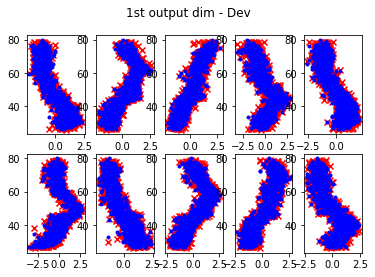

Testing the model
SUM OF eps-LOSS: 1695.744289802451
TEST MEE: 1.8266220554334958


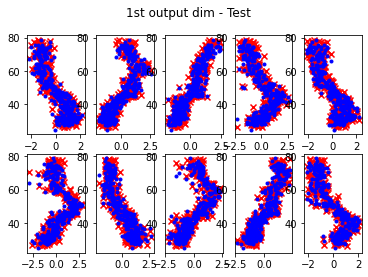

In [9]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')
rbf = cup_model2

In [10]:
cup_model2.history['fstar']

-18916.497392508434

In [11]:
with open("200k_01", "wb") as f:
    pickle.dump({"lin":lin, "poly":poly, "rbf":rbf}, f, protocol=pickle.HIGHEST_PROTOCOL)